In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
import numpy as np

In [73]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dhrubangtalukdar/200-years-of-global-major-earthquakes-18262026")

print("Path to dataset files:", path)

Using Colab cache for faster access to the '200-years-of-global-major-earthquakes-18262026' dataset.
Path to dataset files: /kaggle/input/200-years-of-global-major-earthquakes-18262026


In [74]:
df = pd.read_csv(f"{path}/earthquake1826_2026.csv")

# Exploration

In [75]:
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,id,updated,place,type,horizontalError,depthError,magError,magNst,status
0,2026-01-07 22:00:13.258000+00:00,-23.4332,-179.8984,547.033,5.5,mww,63.0,39.0,5.976,1.13,us7000rnbi,2026-01-07T22:24:28.537Z,south of the Fiji Islands,earthquake,8.66,7.704,0.093,11.0,reviewed
1,2026-01-07 04:12:56.792000+00:00,7.2863,127.0595,11.854,5.5,mww,58.0,53.0,1.485,1.40,us7000rn4a,2026-01-07T16:31:18.040Z,"53 km E of Santiago, Philippines",earthquake,5.21,4.721,0.098,10.0,reviewed
2,2026-01-07 03:02:56.040000+00:00,7.3902,126.7221,35.000,6.4,mww,118.0,30.0,1.178,1.17,us7000rn2z,2026-01-07T15:50:12.915Z,"16 km ESE of Baculin, Philippines",earthquake,7.94,1.842,0.047,44.0,reviewed
3,2026-01-06 23:10:38.371000+00:00,-17.6276,168.2465,62.384,5.0,mww,47.0,79.0,2.388,0.54,us7000rn1j,2026-01-07T12:59:00.885Z,"13 km NNW of Port-Vila, Vanuatu",earthquake,9.64,6.266,0.103,9.0,reviewed
4,2026-01-06 19:17:09.696000+00:00,37.2523,74.6137,10.000,5.2,mb,112.0,54.0,1.991,0.88,us7000rmzt,2026-01-07T05:04:55.711Z,"103 km N of Barishal, Pakistan",earthquake,6.54,1.848,0.049,136.0,reviewed


In [76]:
df["status"].unique()

array(['reviewed', 'automatic'], dtype=object)

In [77]:
df.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,106077.000000,106077.000000,105484.000000,106077.000000,31347.000000,41986.000000,21402.000000,74560.000000,19983.000000,54440.000000,36554.000000,42353.000000
mean,3.794865,40.265552,61.576360,5.452841,157.568507,63.119420,4.236853,0.960075,7.834729,7.982370,0.171523,54.878497
std,30.328921,121.991382,107.751084,0.485270,126.397291,38.590796,5.211970,0.372130,8.643364,10.727341,0.152104,82.993485
min,-77.080000,-179.997000,-4.000000,5.000000,0.000000,6.500000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000
25%,-17.741000,-72.395000,12.000000,5.100000,68.000000,36.000000,1.271000,0.810000,6.030000,1.977500,0.060000,12.000000
50%,-0.569000,99.069000,33.000000,5.300000,118.000000,54.700000,2.533000,0.970000,7.500000,4.900000,0.100000,27.000000
75%,30.160000,142.820000,50.300000,5.700000,210.000000,80.675000,5.008750,1.100000,9.200000,9.600000,0.210000,61.000000
max,87.386000,180.000000,700.000000,9.500000,934.000000,360.000000,41.046000,69.320000,778.000000,1091.900000,1.840000,1027.000000


In [78]:
df.isna().sum()

,0
time,0
latitude,0
longitude,0
depth,593
mag,0
magType,0
nst,74730
gap,64091
dmin,84675
rms,31517


In [79]:
df.apply(lambda col: col.duplicated().sum())

,0
time,1
latitude,30653
longitude,22695
depth,94411
mag,105763
magType,106049
nst,105339
gap,104216
dmin,97083
rms,105805


In [80]:
df.dtypes

,0
time,object
latitude,float64
longitude,float64
depth,float64
mag,float64
magType,object
nst,float64
gap,float64
dmin,float64
rms,float64


In [81]:
corr = df.corr(numeric_only=True)

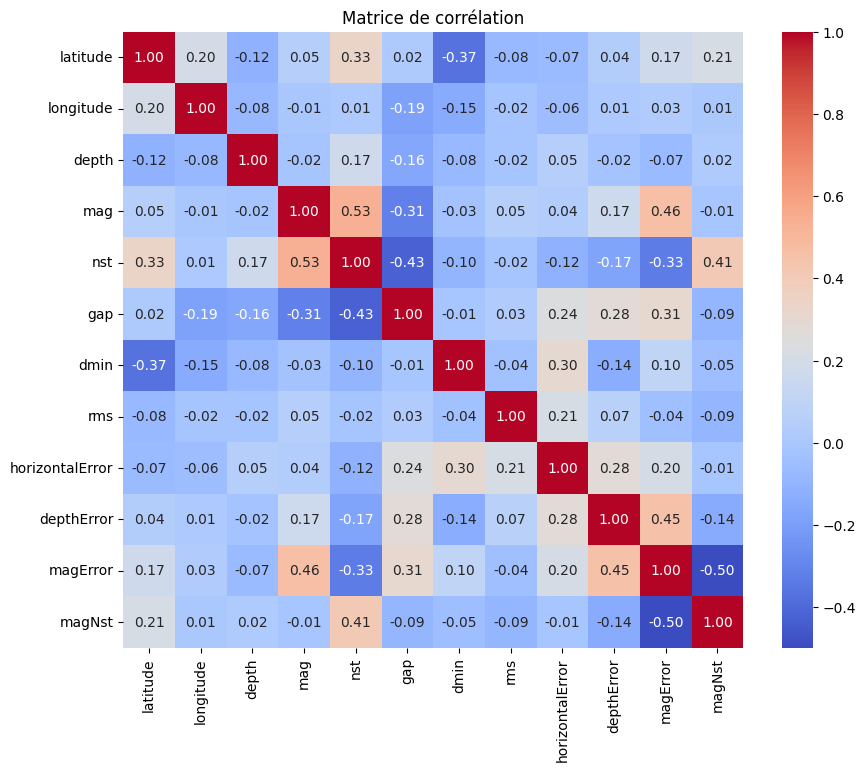

In [82]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation")
plt.show()

In [83]:
corr_table = corr.round(3)
corr_table

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
latitude,1.000,0.198,-0.117,0.055,0.333,0.021,-0.370,-0.077,-0.069,0.044,0.172,0.210
longitude,0.198,1.000,-0.083,-0.005,0.012,-0.185,-0.147,-0.019,-0.056,0.014,0.029,0.010
depth,-0.117,-0.083,1.000,-0.016,0.172,-0.160,-0.077,-0.015,0.052,-0.024,-0.070,0.023
mag,0.055,-0.005,-0.016,1.000,0.533,-0.312,-0.025,0.052,0.038,0.168,0.461,-0.009
nst,0.333,0.012,0.172,0.533,1.000,-0.426,-0.097,-0.018,-0.117,-0.175,-0.331,0.412
gap,0.021,-0.185,-0.160,-0.312,-0.426,1.000,-0.009,0.030,0.242,0.278,0.305,-0.091
dmin,-0.370,-0.147,-0.077,-0.025,-0.097,-0.009,1.000,-0.036,0.302,-0.135,0.103,-0.052
rms,-0.077,-0.019,-0.015,0.052,-0.018,0.030,-0.036,1.000,0.213,0.066,-0.044,-0.091
horizontalError,-0.069,-0.056,0.052,0.038,-0.117,0.242,0.302,0.213,1.000,0.277,0.204,-0.010
depthError,0.044,0.014,-0.024,0.168,-0.175,0.278,-0.135,0.066,0.277,1.000,0.454,-0.143


# Transformation

In [84]:
df_transformed = df.copy()

In [85]:
df_transformed.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,id,updated,place,type,horizontalError,depthError,magError,magNst,status
0,2026-01-07 22:00:13.258000+00:00,-23.4332,-179.8984,547.033,5.5,mww,63.0,39.0,5.976,1.13,us7000rnbi,2026-01-07T22:24:28.537Z,south of the Fiji Islands,earthquake,8.66,7.704,0.093,11.0,reviewed
1,2026-01-07 04:12:56.792000+00:00,7.2863,127.0595,11.854,5.5,mww,58.0,53.0,1.485,1.40,us7000rn4a,2026-01-07T16:31:18.040Z,"53 km E of Santiago, Philippines",earthquake,5.21,4.721,0.098,10.0,reviewed
2,2026-01-07 03:02:56.040000+00:00,7.3902,126.7221,35.000,6.4,mww,118.0,30.0,1.178,1.17,us7000rn2z,2026-01-07T15:50:12.915Z,"16 km ESE of Baculin, Philippines",earthquake,7.94,1.842,0.047,44.0,reviewed
3,2026-01-06 23:10:38.371000+00:00,-17.6276,168.2465,62.384,5.0,mww,47.0,79.0,2.388,0.54,us7000rn1j,2026-01-07T12:59:00.885Z,"13 km NNW of Port-Vila, Vanuatu",earthquake,9.64,6.266,0.103,9.0,reviewed
4,2026-01-06 19:17:09.696000+00:00,37.2523,74.6137,10.000,5.2,mb,112.0,54.0,1.991,0.88,us7000rmzt,2026-01-07T05:04:55.711Z,"103 km N of Barishal, Pakistan",earthquake,6.54,1.848,0.049,136.0,reviewed


In [86]:
for i in df_transformed.select_dtypes(include='number'):
    df_transformed.fillna({i: df_transformed[i].mean()}, inplace=True)

df_transformed.fillna({'place': 'Inconnu'}, inplace=True)

df_transformed.isna().sum()

,0
time,0
latitude,0
longitude,0
depth,0
mag,0
magType,0
nst,0
gap,0
dmin,0
rms,0


In [87]:
df_transformed["time"] = pd.to_datetime(df_transformed["time"], format="mixed", utc=True)
df_transformed["date_ts_ms"] = df_transformed["time"].astype("int64") // 10**6

In [88]:
df_transformed[["magType", "mag"]]

,magType,mag
0,mww,5.5
1,mww,5.5
2,mww,6.4
3,mww,5.0
4,mb,5.2
...,...,...
106072,mw,6.4
106073,mint,5.9
106074,mint,6.2
106075,mw,6.0


In [89]:
df_transformed = pd.get_dummies(df_transformed, columns=['magType'])

In [90]:
df_transformed = df_transformed.drop(["id", "status", "updated", "place", "type", "time"], axis=1)

In [91]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_scaled = df_transformed.copy()
cols = df_scaled.select_dtypes(include="number").columns

df_scaled[cols] = scaler.fit_transform(df_scaled[cols])

In [92]:
df_scaled.head()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,...,magType_mlg,magType_ms,magType_ms_20,magType_mw,magType_mwb,magType_mwc,magType_mwp,magType_mwr,magType_mww,magType_uk
0,-0.897763,-1.804759,4.518020,0.097182,-1.376348,-0.993451,0.742896,0.544656,0.219991,-0.036223,...,False,False,False,False,False,False,False,False,True,False
1,0.115120,0.711479,-0.462753,0.097182,-1.449118,-0.416807,-1.175484,1.410081,-0.699669,-0.424388,...,False,False,False,False,False,False,False,False,True,False
2,0.118545,0.708714,-0.247339,1.951828,-0.575879,-1.364151,-1.306623,0.672867,0.028062,-0.799021,...,False,False,False,False,False,False,False,False,True,False
3,-0.706341,1.049103,0.007517,-0.933178,-1.609212,0.654103,-0.789758,-1.346459,0.481228,-0.223344,...,False,False,False,False,False,False,False,False,True,False
4,1.103158,0.281563,-0.480008,-0.521034,-0.663203,-0.375619,-0.959341,-0.256664,-0.345134,-0.798240,...,False,False,False,False,False,False,False,False,False,False


# Fonctions hyperparamètres

In [93]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [94]:
def display_train_test_metrics(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"MAE  : {mean_absolute_error(y_test, y_pred)}")
    print(f"RMSE : {np.sqrt(mean_squared_error(y_test, y_pred))}")
    print(f"R²   : {r2_score(y_test, y_pred)}")

In [95]:
def search_hyperparameters(max_depths, min_child_weights, n_estimators, learning_rates, X_train, y_train, X_test, y_test):
    for i in max_depths:
        for j in min_child_weights:
            for k in n_estimators:
                for l in learning_rates:
                    print(f'max_depth: {i}, min_child_weight: {j}, n_estimators: {k}, learning_rate: {l}')
                    xgb_model = xgb.XGBRegressor(max_depth=i, min_child_weight=j, n_estimators=k, learning_rate=l, random_state=42)
                    display_train_test_metrics(xgb_model, X_train, y_train, X_test, y_test)

# Model prédiction Magnitude

In [96]:
from sklearn.model_selection import train_test_split
X = df_scaled.drop("mag", axis=1)
y = df_scaled["mag"]
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.2, random_state=42)

In [97]:
X_train_1.shape

(84861, 40)

In [98]:
xgb_model_1 = xgb.XGBRegressor(random_state=42)

In [99]:
xgb_model_1.fit(X_train_1, y_train_1)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

## Analyse


In [100]:
X_test_1.shape

(21216, 40)

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

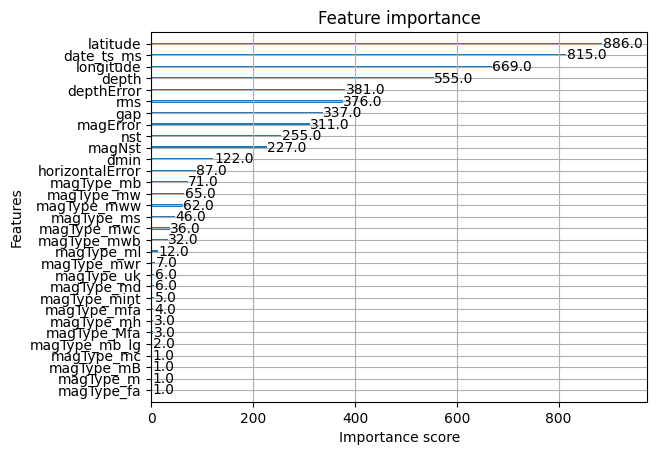

In [101]:
xgb.plot_importance(xgb_model_1)

In [102]:


y_pred = xgb_model_1.predict(X_test_1)

print(f"MAE  : {mean_absolute_error(y_test_1, y_pred)}")
print(f"RMSE : {np.sqrt(mean_squared_error(y_test_1, y_pred))}")
print(f"R²   : {r2_score(y_test_1, y_pred)}")

MAE  : 0.41591944262464314
RMSE : 0.604088209258274
R²   : 0.625500656745345


# Model prédiction Depth

In [103]:
from sklearn.model_selection import train_test_split
X = df_scaled.drop("depth", axis=1)
y = df_scaled["depth"]
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.2, random_state=42)

In [104]:
X_train_2.shape

(84861, 40)

In [105]:
xgb_model_2 = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)

In [106]:
xgb_model_2.fit(X_train_2, y_train_2)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

## Analyse

In [107]:
X_test_1.shape

(21216, 40)

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

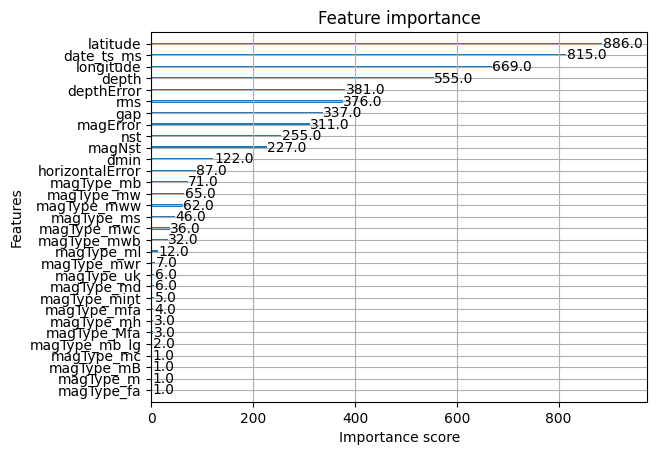

In [108]:
xgb.plot_importance(xgb_model_1)

In [109]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = xgb_model_1.predict(X_test_1)

print(f"MAE  : {mean_absolute_error(y_test_1, y_pred)}")
print(f"RMSE : {np.sqrt(mean_squared_error(y_test_1, y_pred))}")
print(f"R²   : {r2_score(y_test_1, y_pred)}")

MAE  : 0.41591944262464314
RMSE : 0.604088209258274
R²   : 0.625500656745345
